In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/TunisiaExport.csv')

# Check for missing values
print(df.isnull().sum())

Période                                           0
Agriculture et pêche                              0
Industries Agro-alimentaires                      0
Industrie du Tabac                                0
Textile, Habillement et cuir                      0
Industries diverses                               0
Raffinage de pétrole                              0
Industries chimiques                              0
Materiaux de construction, céramique et verre     0
Industries mécaniques et éléctriques              0
Extraction de pétrole  et gaz naturel             0
Mines                                             0
Transports                                        0
Poste et télécommunication                        0
Services financiers                               0
Autres Services marchands                         0
Services  non marchands                          17
Correction territoriale                           0
Total                                             0
dtype: int64

In [3]:
#dropping collumns with missing values
df.dropna(axis=1, inplace=True)

In [4]:
print(df.dtypes)


Période                                            int64
Agriculture et pêche                             float64
Industries Agro-alimentaires                      object
Industrie du Tabac                               float64
Textile, Habillement et cuir                      object
Industries diverses                               object
Raffinage de pétrole                              object
Industries chimiques                              object
Materiaux de construction, céramique et verre    float64
Industries mécaniques et éléctriques              object
Extraction de pétrole  et gaz naturel             object
Mines                                            float64
Transports                                        object
Poste et télécommunication                       float64
Services financiers                              float64
Autres Services marchands                         object
Correction territoriale                           object
Total                          

In [5]:
#converting string values to numeric values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce').astype(float)

In [6]:
print(df.dtypes)

Période                                            int64
Agriculture et pêche                             float64
Industries Agro-alimentaires                     float64
Industrie du Tabac                               float64
Textile, Habillement et cuir                     float64
Industries diverses                              float64
Raffinage de pétrole                             float64
Industries chimiques                             float64
Materiaux de construction, céramique et verre    float64
Industries mécaniques et éléctriques             float64
Extraction de pétrole  et gaz naturel            float64
Mines                                            float64
Transports                                       float64
Poste et télécommunication                       float64
Services financiers                              float64
Autres Services marchands                        float64
Correction territoriale                          float64
Total                          

Cette base de données sur les exports de la Tunisie entre 1997 et 2014 offre une compréhension générale des dynamiques du commerce extérieur du pays pour à peu prés deux décennies offrant plusieurs variables incluant le total des exports et les catégories. La source est une dataset trouvé sur Kaggle https://www.kaggle.com/datasets/ajaafer/tunisia-export/data. Cette data peut etre utilisé aprés analyse statstique pour l'dntification des secteurs clés de l'économie et établir une prévision des futurs possibles tendances d'exports.   

In [21]:
Y = df['Total'] # variable endogène
X = df.drop(columns=['Période','Total']) #variables explicatives

Hypothèses avant l'analyse des données:
1.   Le total des exports est croissant pour tout les domaines au fil du temps
2.   Les industries mécaniques et électriques font une grande partie du total des exports
3.   Certains secteurs ont une forte corrélation comme industries chimiques, raffinage de pétrole et les mines.
4.   Les différents secteurs peuvent etre perturbés par des évènements reliés au pays comme la révolution en 2011.
5.   Les secteurs des exports peuvent etre diminués en un nombre inférieur de groupes qui sont fortement corrélées.
6.   La distibution diffèrent d'une varibale à une autre.
7.   La distribution du total des exports suit la loi normale.


In [8]:
# Calculating basic statics indicators
print(df.describe())

           Période  Agriculture et pêche  Industries Agro-alimentaires  \
count    18.000000             18.000000                     18.000000   
mean   2005.500000            359.355556                   1101.938889   
std       5.338539            206.707094                    558.260050   
min    1997.000000            100.900000                    437.300000   
25%    2001.250000            201.675000                    533.525000   
50%    2005.500000            304.750000                   1137.250000   
75%    2009.750000            562.875000                   1511.900000   
max    2014.000000            669.100000                   2034.900000   

       Industrie du Tabac  Textile, Habillement et cuir  Industries diverses  \
count           18.000000                     18.000000            18.000000   
mean            50.055556                   5067.572222           692.144444   
std             11.024156                   1078.202075           457.242075   
min          

In [9]:
# showing the first 5 lines
df.head(5)

,Période,Agriculture et pêche,Industries Agro-alimentaires,Industrie du Tabac,"Textile, Habillement et cuir",Industries diverses,Raffinage de pétrole,Industries chimiques,"Materiaux de construction, céramique et verre",Industries mécaniques et éléctriques,Extraction de pétrole et gaz naturel,Mines,Transports,Poste et télécommunication,Services financiers,Autres Services marchands,Correction territoriale,Total
0,1997,100.9,516.1,66.1,2974.6,148.7,148.6,774.6,97.0,857.4,424.0,58.0,634.2,16.7,78.7,354.5,1724.1,8974.1
1,1998,131.2,444.4,51.4,3324.3,153.7,100.1,827.0,95.5,1056.7,296.1,56.7,641.9,18.1,78.5,381.5,1906.4,9563.5
2,1999,115.3,631.2,43.2,3369.1,202.8,120.8,811.3,99.0,1016.0,506.0,72.1,627.9,16.4,84.4,430.6,2190.3,10336.3
3,2000,115.4,489.9,37.1,3847.1,211.3,119.9,826.9,104.5,1344.0,838.6,90.6,732.5,17.0,113.6,481.0,2324.5,11693.9
4,2001,239.8,489.9,50.2,4660.7,316.1,201.6,940.7,121.4,1760.8,690.7,89.4,812.6,19.1,107.2,554.7,2538.0,13592.8


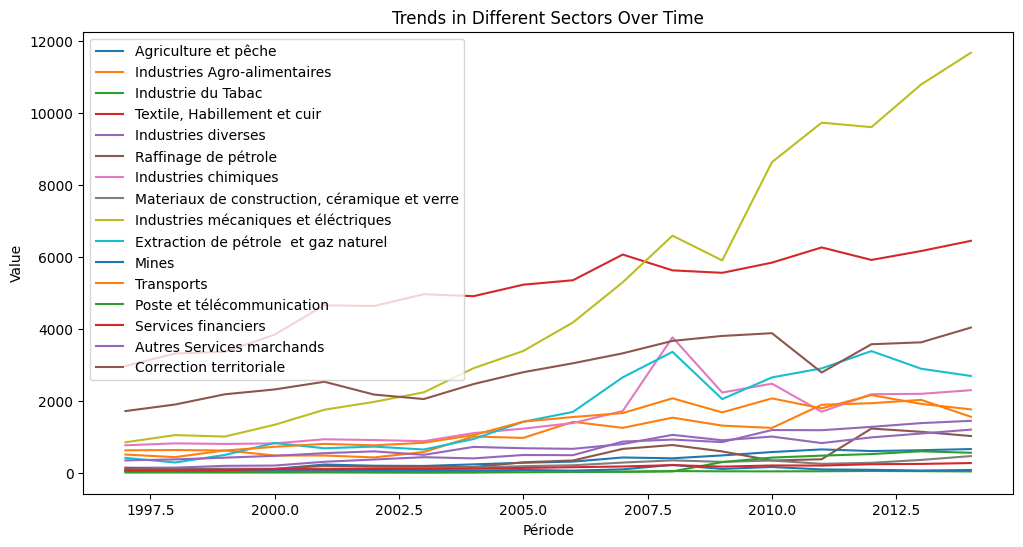

In [10]:
# Line plot for each sector over time
plt.figure(figsize=(12, 6))
for column in df.columns[1:-1]:  # Exclude 'Période' and 'Total' columns
    plt.plot(df['Période'], df[column], label=column)
plt.xlabel('Période')
plt.ylabel('Value')
plt.title('Trends in Different Sectors Over Time')
plt.legend()
plt.show()

*-  On remarque une croissance notamment remarqué dans les exports de secteurs d'industries mécaniques et éléctriques, de textile, correction territoriale et un peu moins remarqué dans l'extraction de pétrole et de gaz et les industries chimiques. Ce qui confirme l'hypothèse 1.
*-  On remarque une chute dans presque tous les domaines autour de 2010 (période de la révolution tunisienne) ce qui confirme l'hypothèse 4.
*-  Les industries électriques et mécaniques ont la plus grande part des exports de la Tunisie (Tendance de ces industries dans le monde).
Ce qui confirme l'hypothèse 2.

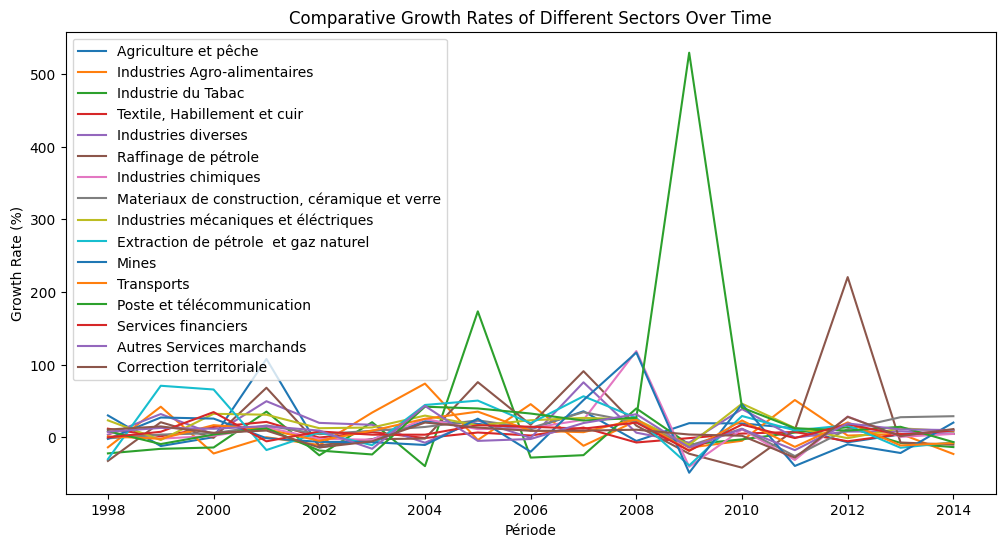

In [11]:
# Calculate growth rates for each sector
df_growth = df.copy()
df_growth.iloc[:, 1:-1] = df_growth.iloc[:, 1:-1].pct_change() * 100

# Plot growth rates for each sector
plt.figure(figsize=(12, 6))
for column in df_growth.columns[1:-1]:
    plt.plot(df_growth['Période'], df_growth[column], label=column)
plt.xlabel('Période')
plt.ylabel('Growth Rate (%)')
plt.title('Comparative Growth Rates of Different Sectors Over Time')
plt.legend()
plt.show()


In [12]:
def plotPerColumnDistribution(df, rows, cols):
    # Calculate total number of columns
    num_cols = df.shape[1]

    # Calculate the number of plots needed
    num_plots = num_cols // (rows * cols)
    num_plots += num_cols % (rows * cols) > 0

    # Create subplots
    fig, axes = plt.subplots(num_plots, figsize=(cols*5, rows*5))

    # Flatten axes if only one plot
    if num_plots == 1:
        axes = [axes]

    # Loop through columns and plot distribution
    for i, ax in enumerate(axes):
        start = i * rows * cols
        end = min((i + 1) * rows * cols, num_cols)
        subset = df.iloc[:, start:end]
        subset.hist(ax=ax)

    plt.tight_layout()
    plt.show()

In [13]:
plotPerColumnDistribution(df, 18, 19)

<ipython-input-12-5e0fed746b84>:21: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  subset.hist(ax=ax)


Les variables suivent différentes distrubtions comme admettant dans l'hypothèse 6.
Parmis les distributions, on remarque que:

-Plusieurs variables suivent la distribution exponentiolle comme le raffinage du pétrole, les industries chimiques, les industries électriques et mécaniques, mines, matériaux de contruction, céramiques et verres et autres. cela indique que les événements qu'elle modélise ont une certaine constance dans leur taux d'occurrence, avec une diminution exponentielle de la probabilité d'attente pour des intervalles de temps plus longs.

-D'autres variables suivent la ditribution de Bernoulli notamment le Total des exports, extraction de pétrole et du gaz, services financiers, textile, agriculture et pèche et autres.  cela signifie qu'elle prend deux valeurs possibles distinctes, généralement notées 0 et 1, avec une probabilité de succès p pour la valeur 1 et une probabilité d'échec 1-p pour la valeur 0. Cela peut etre du qu'elle sont reliés à des matiéres premières qui sont reliés aussi à la nature et l'environnement comme la météo.

-L'industrie du tabac est la seule qui suit la distrubtion normale.
 La distribution normale suggère qu'il existe une exportation moyenne d'industrie du tabac autour de laquelle la plupart des exportations se situent. Cela permet de déterminer le niveau moyen des exportations de tabac du pays.

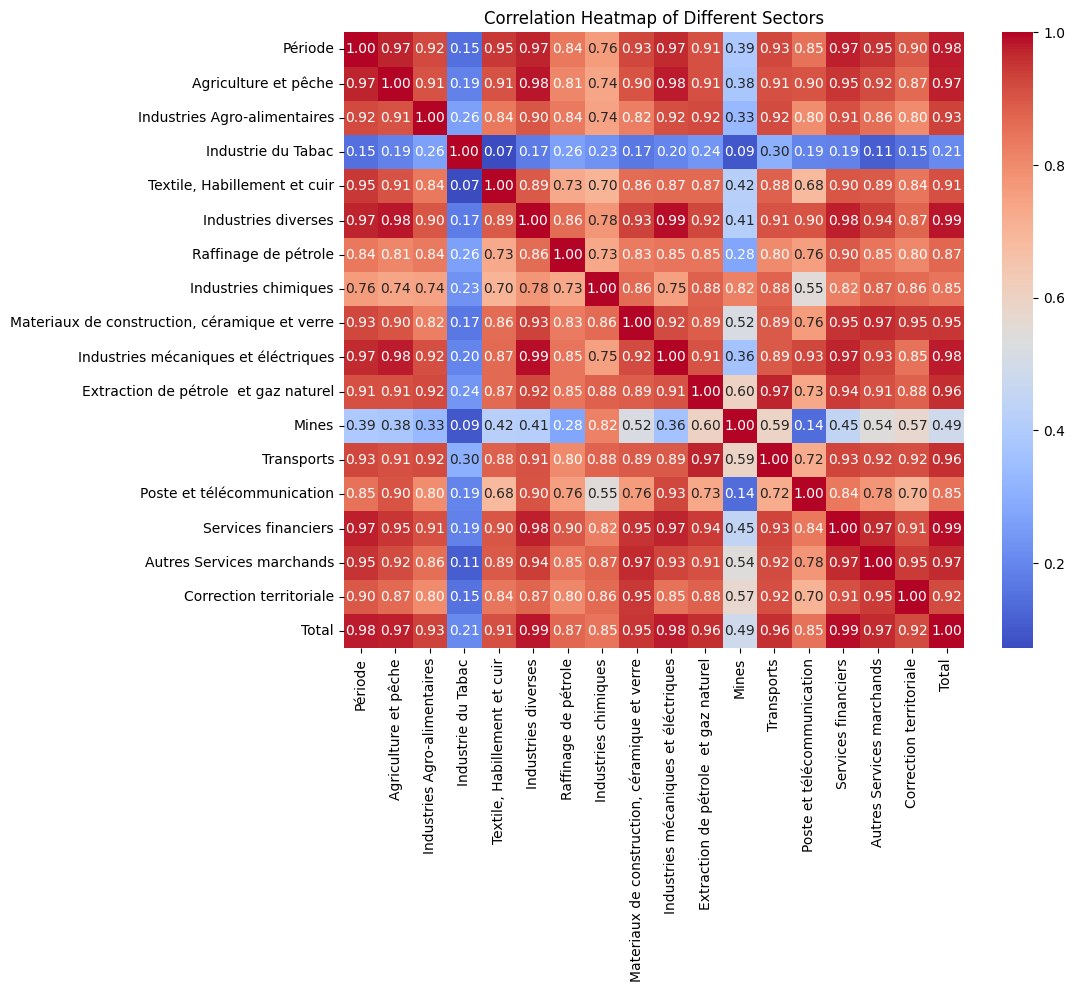

In [14]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Different Sectors')
plt.show()


On remarque les exports de l'industrie du tabac et les mines ont une faible corrélation avec les autres variables.

Il y a une forte corrélation entre les services financiers et les induries électriques et mécaniques, les industies diverses, le total des exports, l'agriculture et la pèche.

Il y aune forte corrélation entre les mines et les industries chimiques.


In [15]:
'''En explorant la matrice de corrélation, on peut voir que le lien entre X et Y(total) est significatif
pour la plupart des variables X à l'exception de l'industrie du tabac et des mines'''

"En explorant la matrice de corrélation, on peut voir que le lien entre X et Y(total) est significatif\npour la plupart des variables X à l'exception de l'industrie du tabac et des mines"

In [22]:
#Using Ordinary least squares model
X_with_constant = sm.add_constant(X)
model = sm.OLS(Y, X_with_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.452e+13
Date:                Sun, 05 May 2024   Prob (F-statistic):           9.10e-08
Time:                        22:27:08   Log-Likelihood:                 122.03
No. Observations:                  18   AIC:                            -210.1
Df Residuals:                       1   BIC:                            -194.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


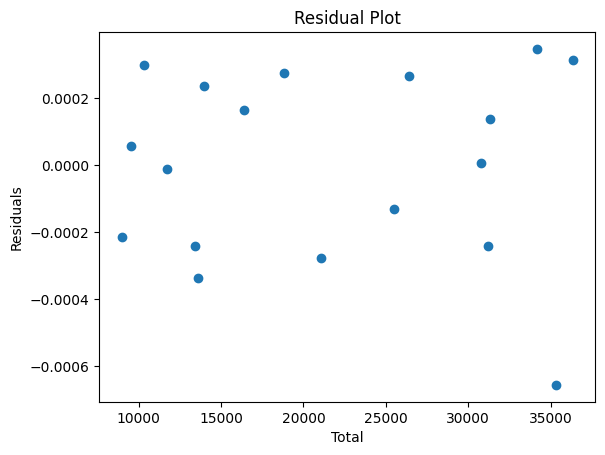

In [23]:
residuals = model.resid
plt.scatter(Y, residuals)
plt.title('Residual Plot')
plt.xlabel('Total')
plt.ylabel('Residuals')
plt.show()

In [26]:
# Identify outliers using z-score
z_scores = np.abs((df - df.mean()) / df.std())
outliers = z_scores > 3  # Threshold z-score for outlier detection (e.g., 3)

# Removing outliers
data_no_outliers = df[~outliers.any(axis=1)]

# Transform data (example: log transformation)
data_transformed = np.log(df)

# Using Robust linear regression model using Huber loss function
model_robust = sm.RLM(Y, X).fit()  # Robust linear regression using Huber loss function

print(model_robust.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  Total   No. Observations:                   18
Model:                            RLM   Df Residuals:                        2
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 05 May 2024                                         
Time:                        22:40:30                                         
No. Iterations:                    50                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [29]:
quantitative_variables = df.drop(columns=["Période", "Total"])

# Standardize the data for PCA
scaler = StandardScaler()
quantitative_variables_scaled = scaler.fit_transform(quantitative_variables)

pca = PCA()
principal_components = pca.fit_transform(quantitative_variables_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

Explained variance ratio: [7.87634925e-01 7.97883815e-02 6.37236505e-02 1.92191577e-02
 1.85909720e-02 1.42742134e-02 6.49066412e-03 4.47334504e-03
 2.47557886e-03 1.43187989e-03 8.99404688e-04 5.75039079e-04
 3.10180542e-04 9.63940930e-05 1.12291697e-05 4.98432291e-06]
Cumulative explained variance ratio: [0.78763493 0.86742331 0.93114696 0.95036611 0.96895709 0.9832313
 0.98972196 0.99419531 0.99667089 0.99810277 0.99900217 0.99957721
 0.99988739 0.99998379 0.99999502 1.        ]


L'étude permet de prédire le total des exports dans les années futures et les surtout les secteurs de l'économie essentielles dans les exports de la Tunisie. Une limitation peut etre de cette étude est que les données collectés ont un petit volume ce qui entraine une performance pas si bonne de model prévenant les exports des années futures. Aussi, plusieurs secteurs peuvent etre associés dans ses sous secteurs globales comme l'industrie, la technologie, l'agriculture, etc...
Un autre point à ajouter, est que les exports ne donnent pas une complète vue sur l'économie du pays, il reste à analyser les imports, la production et la consommation et d'autres facteurs économiques importants.